In [2]:
from datetime import date
import warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd
import seaborn as sns
from scipy.stats import multivariate_normal

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

# Part 1

## 1 task
        Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
        Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Пусть событие $A$ - у подсудимого редкая группа крови.

Тогда событие $B$ - подсудимый виновен.

Прокурор говорит, что $P(A|\neg B) = 0.01$. И из этого он делает вывод, что $P(B|A) = 0.99$.

В данном случае прокурор решил, что $P(B|A) + P(A|\neg B) = 1$. На самом же деле $P(\neg A|\neg B) + P(A|\neg B) = 1$. То есть, прокурор на самом деле посчитал $P(\neg A|\neg B)$ - вероятность, что у подсудимого не редкая кровь, при условии его невиновности.

Прокурор должен был посчитать $P(B|A)$ - вероятность, что подсудимый виновен, при условии, что у него редкая группа крови.

$P(B|A) = \frac{P(A|B)P(B)}{P(A)} = \frac{P(A|B)P(B)}{P(A|B)P(B)+P(A|\neg B)P(\neg B)}$

$P(A|B) = 1$, $P(A) = 0.01$. Следовательно, $P(B|A) = \frac{P(B)}{P(B)+0.01*(1-P(B))} = \frac{P(B)}{0.01+0.99*P(B)}$

## 2 task
        Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат считает, что 1 из 10000 людей с редкой группой крови является убийцей, $P(B|A) = {{1}\over {10000}} = 0.0001$. Это число получается из теоремы Байеса, расписанной в 1 задаче $P(B|A) = \frac{P(B)}{0.01+0.99*P(B)}$ при $P(B) \approx {{1}\over {1000000}}$. В данном случае нельзя считать, что априорная вероятность убийства для всех людей одинакова, потому что как минимум некоторые люди просто физически не могли совершить это убийство (есть дети, пожилые люди, люди, имеющие алиби и тд)

## 3 task
        Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
        Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
        Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [3]:
p_disease = 0.01


def posterior_disease_positive_test(fp, fn):
    p_t_d = 1 - fn
    p_t = p_t_d * p_disease + fp * (1 - p_disease)
    return (p_t_d * p_disease) / p_t


def posterior_disease_negative_test(fp, fn):
    p_not_t_d = fn
    p_not_t = p_not_t_d * p_disease + (1 - fp) * (1 - p_disease)
    return (p_not_t_d * p_disease) / p_not_t

print(posterior_disease_positive_test(fp=0.05, fn=0.05))
print(posterior_disease_negative_test(fp=0.05, fn=0.05))

0.16101694915254236
0.0005313496280552604


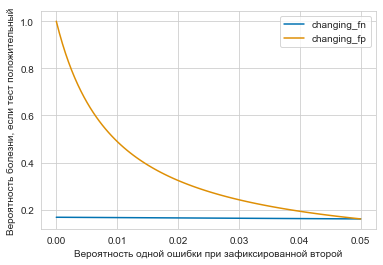

In [4]:
changing_fp = lambda x: posterior_disease_positive_test(fp=0.05, fn=x)
changing_fn = lambda x: posterior_disease_positive_test(fp=x, fn=0.05)
x = np.linspace(1e-9, 0.05, 100)
plt.ylabel("Вероятность болезни, если тест положительный")
plt.xlabel("Вероятность одной ошибки при зафиксированной второй")
plt.plot(x, changing_fp(x), label="changing_fn")
plt.plot(x, changing_fn(x), label="changing_fp")
plt.legend()
plt.show()

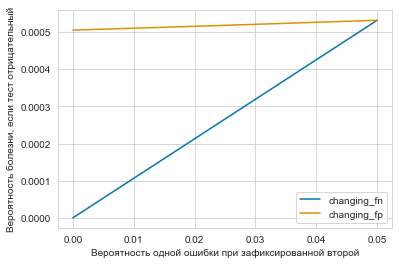

In [5]:
changing_fp = lambda x: posterior_disease_negative_test(fp=0.05, fn=x)
changing_fn = lambda x: posterior_disease_negative_test(fp=x, fn=0.05)
x = np.linspace(1e-9, 0.05, 100)
plt.ylabel("Вероятность болезни, если тест отрицательный")
plt.xlabel("Вероятность одной ошибки при зафиксированной второй")
plt.plot(x, changing_fp(x), label="changing_fn")
plt.plot(x, changing_fn(x), label="changing_fp")
plt.legend()
plt.show()

* На графиках видно, что если мы будем уменьшать false positive при зафиксированном false negative, то апостериорная вероятность болезни при положительном тесте будет очень быстро увеличиваться. То есть, нам есть смысл уменьшать false positive. Если бы мы этого не делали, то мы бы не были уверены в болезни людей, при условии положительного теста. Следовательно, если бы нам обязательно нужно было класть таких людей на карантин в больницу, то больница быстро переполнилась (мест не бесконечно много).
* С другой стороны, если мы будем уменьшать false negative при зафиксированном false positive, то апостериорная вероятность болезни при отрицательном тесте тоже будет уменьшаться (но не так быстро). Если нам важнее не пропускать больного человека при отрицательном тесте, то можно сосредоточиться и на уменьшении false negative. С другой стороны, при зафиксированном false negative апостериорная вероятность болезни при отрицательном тесте довольно мала.
* Вердикт: уменьшать false positive.

# Part 2

## 1 task. 
        Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [6]:
df = pd.read_csv("./owid-covid-data.csv")

df = df[df["location"] == "Russia"]

df["date"] = pd.to_datetime(df["date"])
df = df[df["date"] >= "2020-03-03"]

df.loc[df["new_cases"] == 0, "new_cases"] = 1 # replace all 0 to 1 in "new_cases" column

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
50733,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50734,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50735,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50736,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50737,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50738,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50739,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50740,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50741,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50742,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [7]:
train_size = 50
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

## 2 task
        Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

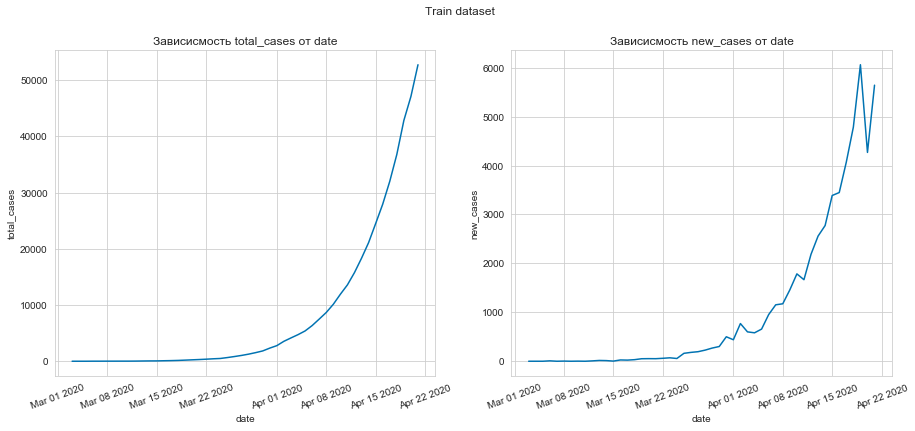

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Train dataset')

ax1.set_title("Зависисмость total_cases от date")
ax1.plot(df_train["date"], df_train["total_cases"])
ax1.set(xlabel="date", ylabel="total_cases")
ax1.tick_params(axis="x", labelrotation=20)
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %d %Y'))

ax2.set_title("Зависисмость new_cases от date")
ax2.plot(df_train["date"], df_train["new_cases"])
ax2.set(xlabel="date", ylabel="new_cases")
ax2.tick_params(axis="x", labelrotation=20)
ax2.xaxis.set_major_formatter(dates.DateFormatter('%b %d %Y'))

plt.show()

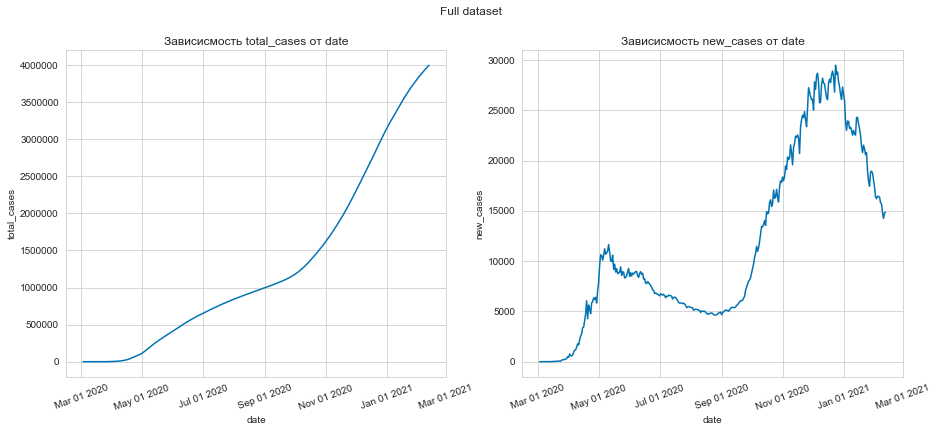

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Full dataset')

ax1.set_title("Зависисмость total_cases от date")
ax1.plot(df["date"], df["total_cases"])
ax1.set(xlabel="date", ylabel="total_cases")
ax1.tick_params(axis="x", labelrotation=20)
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %d %Y'))

ax2.set_title("Зависисмость new_cases от date")
ax2.plot(df["date"], df["new_cases"])
ax2.set(xlabel="date", ylabel="new_cases")
ax2.tick_params(axis="x", labelrotation=20)
ax2.xaxis.set_major_formatter(dates.DateFormatter('%b %d %Y'))

plt.show()

### subtask a
        Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x),    где x — номер текущего дня.

* обучаем модель

In [11]:
from sklearn.linear_model import LinearRegression

x_train = np.arange(0, train_size)
log_total_cases = np.log(df_train["total_cases"].values)
log_new_cases = np.log(df_train["new_cases"].values)

lin_reg_for_total_cases = LinearRegression()
lin_reg_for_new_cases = LinearRegression()

lin_reg_for_total_cases.fit(x_train[..., None], log_total_cases)
lin_reg_for_new_cases.fit(x_train[..., None], log_new_cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
x_test = np.arange(train_size, len(df))

preds_log_test_total_cases = lin_reg_for_total_cases.predict(x_test[..., None])
preds_log_test_new_cases = lin_reg_for_new_cases.predict(x_test[..., None])

preds_test_total_cases = np.exp(preds_log_test_total_cases)
preds_test_new_cases = np.exp(preds_log_test_new_cases)

preds_log_train_total_cases = lin_reg_for_total_cases.predict(x_train[..., None])
preds_log_train_new_cases = lin_reg_for_new_cases.predict(x_train[..., None])

preds_train_total_cases = np.exp(preds_log_train_total_cases)
preds_train_new_cases = np.exp(preds_log_train_new_cases)

* строим графики предсказаний модели (первый график специально "урезан" по оси x и y из-за очень быстрого возрастания предсказания на test множестве; если рисовать в полный масштаб, то кроме красной линии ничего не будет видно)

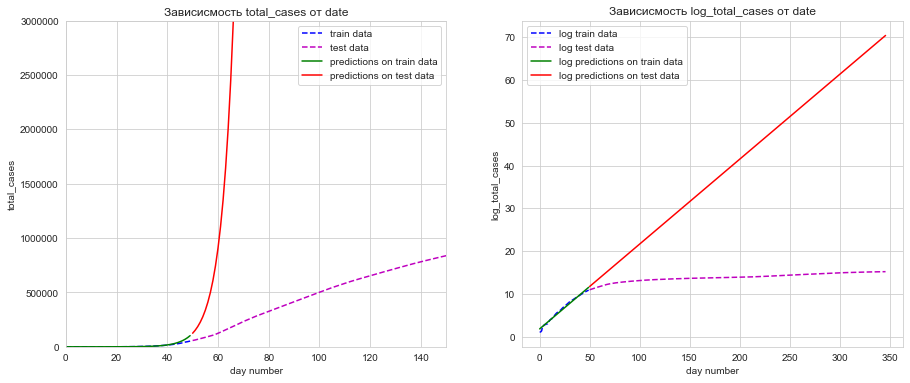

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.set_title("Зависисмость total_cases от date")
ax1.plot(x_train, df_train["total_cases"].values, "--b", label="train data")
ax1.plot(x_test, df_test["total_cases"].values, "--m", label="test data")
ax1.plot(x_train, preds_train_total_cases, "g", label="predictions on train data")
ax1.plot(x_test, preds_test_total_cases, "r", label="predictions on test data")
ax1.set(xlabel="day number", ylabel="total_cases")
ax1.set_xlim(0, 150)
ax1.set_ylim(0, 3e6)
ax1.legend()

ax2.set_title("Зависисмость log_total_cases от date")
ax2.plot(x_train, log_total_cases, "--b", label="log train data")
ax2.plot(x_test, np.log(df_test["total_cases"].values), "--m", label="log test data")
ax2.plot(x_train, preds_log_train_total_cases, "g", label="log predictions on train data")
ax2.plot(x_test, preds_log_test_total_cases, "r", label="log predictions on test data")
ax2.set(xlabel="day number", ylabel="log_total_cases")
ax2.legend()

plt.show()

### subtask b
        Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

##### Для total_cases

In [14]:
true_mu = [lin_reg_for_total_cases.coef_[0], lin_reg_for_total_cases.intercept_]
print(f"Наклон: {true_mu[0]}, смещение: {true_mu[1]}")

Наклон: 0.19829091233588567, смещение: 1.820737148784695


* оценим sigma_noise

In [15]:
def get_sigma_noise(data, predictions):
    return np.sqrt((data - predictions).var())

sigma_noise = get_sigma_noise(log_total_cases, preds_log_train_total_cases)

In [16]:
def bayesian_update(mu, sigma, x, y, sigma_noise=sigma_noise):
    x_matrix = np.array([[1, *x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

* Найдем апостериорное распределение параметров модели и нарисуем красивый график

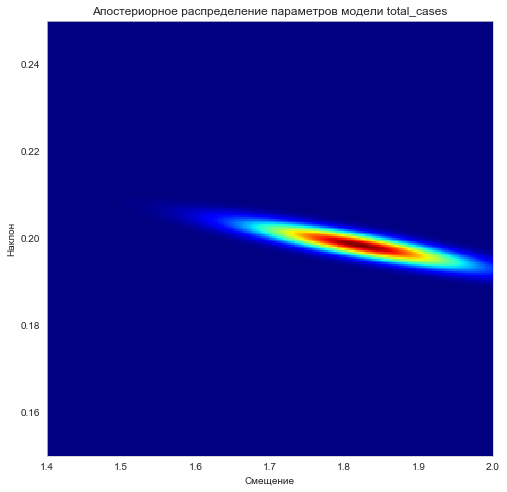

In [17]:
N = 250

cur_mu, cur_sigma = np.array([0, 0]), 10 * np.array([[1, 0], [0, 1]])

for i in range(train_size):
    px, py = x_train[i], log_total_cases[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, [px], py)

plot_lims = (
    (1.4, 2.),
    (0.15, 0.25)
)

X = np.linspace(*plot_lims[0], N)
Y = np.linspace(*plot_lims[1], N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

plt.figure(figsize=(8, 8))
plt.xlim(plot_lims[0])
plt.ylim(plot_lims[1])
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.title('Апостериорное распределение параметров модели total_cases')
plt.xlabel('Смещение')
plt.ylabel('Наклон')
plt.show()

In [18]:
print(f"Наклон: {cur_mu[1]}, смещение: {cur_mu[0]}")

Наклон: 0.1983428243372497, смещение: 1.8190220801520915


##### Для new_cases

In [19]:
true_mu_new_cases = [lin_reg_for_new_cases.coef_[0], lin_reg_for_new_cases.intercept_]
print(f"Наклон: {true_mu_new_cases[0]}, смещение: {true_mu_new_cases[1]}")

Наклон: 0.18596309168510522, смещение: 0.3206875188996463


In [20]:
sigma_noise_new_cases = get_sigma_noise(log_new_cases, preds_log_train_new_cases)

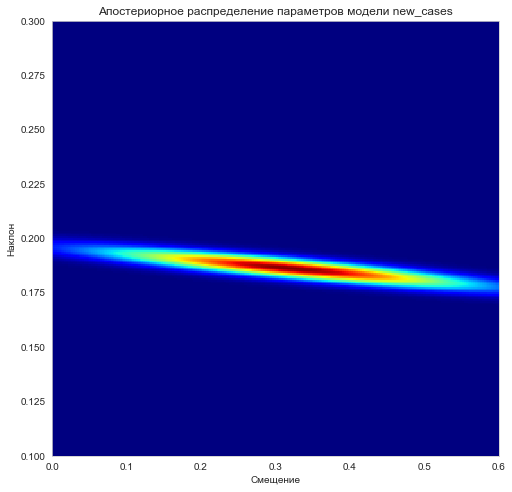

In [21]:
cur_mu_new_cases, cur_sigma_new_cases = np.array([0, 0]), 10 * np.array([[1, 0], [0, 1]])

for i in range(train_size):
    px, py = x_train[i], log_new_cases[i]
    cur_mu_new_cases, cur_sigma_new_cases = bayesian_update(cur_mu_new_cases, cur_sigma_new_cases, [px], py, sigma_noise=sigma_noise_new_cases)

plot_lims = (
    (0., 0.6),
    (0.1, 0.3)
)

X = np.linspace(*plot_lims[0], N)
Y = np.linspace(*plot_lims[1], N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z = multivariate_normal.pdf(pos, mean=cur_mu_new_cases, cov=cur_sigma_new_cases)

plt.figure(figsize=(8, 8))
plt.xlim(plot_lims[0])
plt.ylim(plot_lims[1])
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.title('Апостериорное распределение параметров модели new_cases')
plt.xlabel('Смещение')
plt.ylabel('Наклон')
plt.show()

In [22]:
print(f"Наклон: {cur_mu_new_cases[1]}, смещение: {cur_mu_new_cases[0]}")

Наклон: 0.1859891947217348, смещение: 0.3198207241077


### subtask c
        Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [23]:
def myplot_sample_lines(mu, sigma, xs=np.arange(0, 70), n=200, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

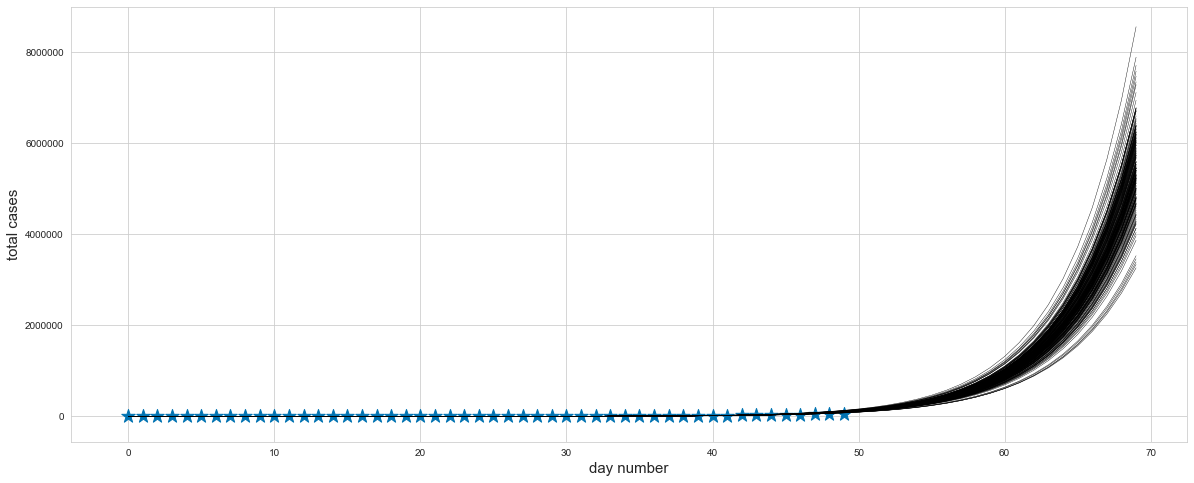

In [24]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
plt.xlabel("day number", fontsize=15)
plt.ylabel("total cases", fontsize=15)
myplot_sample_lines(cur_mu, cur_sigma, n=200, points=[x_train, df_train["total_cases"].values])

In [25]:
# Нарисуем результат
def plot_predictions(xs, mu, x, train_points, test_points):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    plt.xlabel("day number", fontsize=15)
    plt.ylabel("total cases", fontsize=15)
    ax.set_xlim((xs[0], xs[-1]))
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(train_points[0], train_points[1], marker='*', color="blue", s=100, label="train data")
    ax.scatter(test_points[0], test_points[1], marker='*', color="green", s=100, label="test data")
    ax.legend(fontsize=legend_fontsize)

In [26]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1]*xs)
    return res

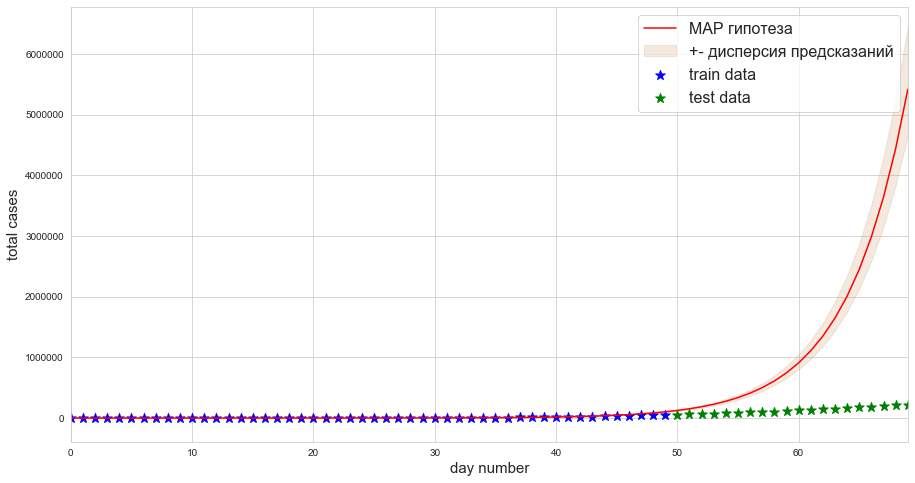

In [27]:
xs = np.arange(0, 70)
x = sample_statistics(cur_mu, cur_sigma, xs, n=200)
plot_predictions(xs, cur_mu, x, [x_train, df_train["total_cases"].values], [x_test[:20], df_test["total_cases"].values[:20]])

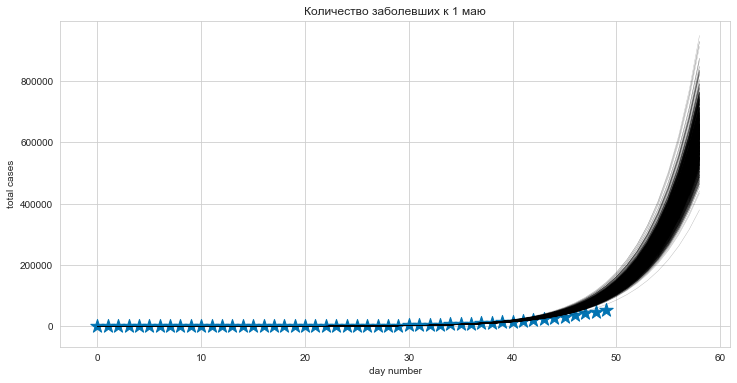

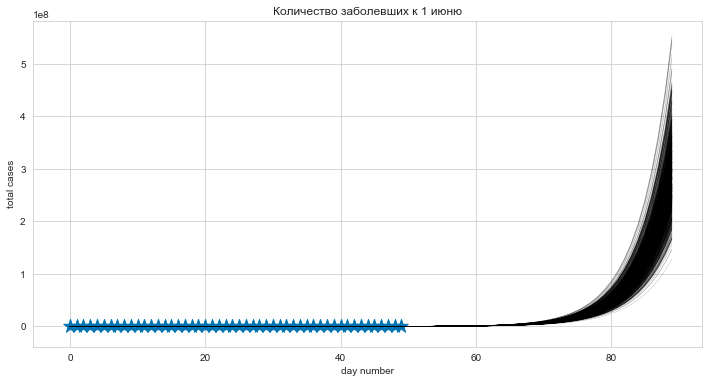

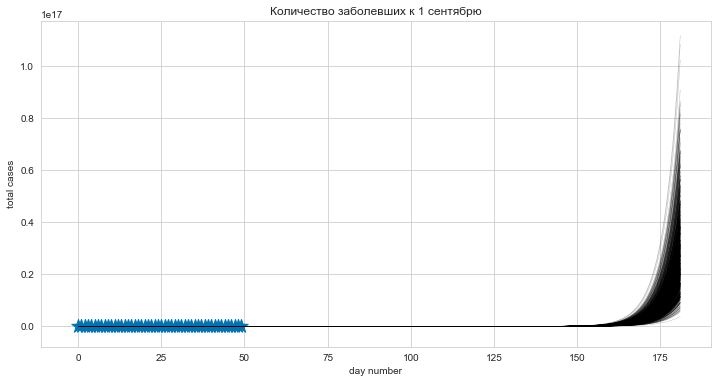

In [28]:
begin_date = date(2020, 3, 3)
may_1 = (date(2020, 5, 1) - begin_date).days
june_1 = (date(2020, 6, 1) - begin_date).days
september_1 = (date(2020, 9, 1) - begin_date).days


def myplot_sample_lines(mu, sigma, xs=np.arange(0, 70), n=200, points=None):
    # Посэмплируем и порисуем прямые, вернем статистику по последнему дню
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        y = np.exp(w[0] + w[1]*xs)
        plt.plot(xs, y, 'k-', lw=.4, alpha=0.3)
        res[i,:] = y
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    return res[:,-1]


fig = plt.figure(figsize=(12, 6))
may_dist = myplot_sample_lines(cur_mu, cur_sigma, xs=np.arange(0, may_1), n=1000, points=[x_train, df_train["total_cases"].values])
plt.title("Количество заболевших к 1 маю")
plt.xlabel("day number")
plt.ylabel("total cases")
plt.show()
fig = plt.figure(figsize=(12, 6))
june_dist = myplot_sample_lines(cur_mu, cur_sigma, xs=np.arange(0, june_1), n=1000, points=[x_train, df_train["total_cases"].values])
plt.title("Количество заболевших к 1 июню")
plt.xlabel("day number")
plt.ylabel("total cases")
plt.show()
fig = plt.figure(figsize=(12, 6))
september_dist = myplot_sample_lines(cur_mu, cur_sigma, xs=np.arange(0, september_1), n=1000, points=[x_train, df_train["total_cases"].values])
plt.title("Количество заболевших к 1 сентябрю")
plt.xlabel("day number")
plt.ylabel("total cases")
plt.show()

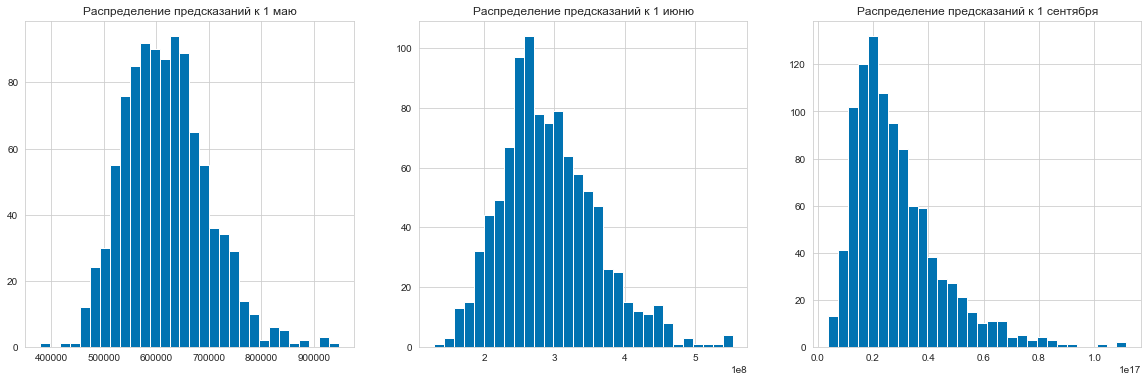

Среднее количество заболевших к 1 маю составляет 618699.705906102
Среднее количество заболевших к 1 июню составляет 292529178.9018367
Среднее количество заболевших к 1 сентябрю составляет 2.84303085435079e+16


In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

ax1.set_title("Распределение предсказаний к 1 маю")
ax1.hist(may_dist, bins=30)
ax2.set_title("Распределение предсказаний к 1 июню")
ax2.hist(june_dist, bins=30)
ax3.set_title("Распределение предсказаний к 1 сентября")
ax3.hist(september_dist, bins=30)

plt.show()

for i, j in zip([may_dist, june_dist, september_dist], ["маю", "июню", "сентябрю"]):
    print(f"Среднее количество заболевших к 1 {j} составляет {i.mean()}")

## 3 task
        Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана.
        Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

### subtask a
        Предложите способ обучать параметры сигмоидальной функции при помощи линейной регрессии.

* Если продифференцировать функцию распределения для гауссиан, то мы получим функцию плотности гауссианы: ${\displaystyle {\frac {c}{\sigma {\sqrt {2\pi }}}}\;\exp \left(-{\frac {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}\right)}$. Можно заметить, что в нашей задаче переменная total_cases - это куммулятивная сумма переменной new_cases. Мы можем моделировать new_cases функцией плотности гауссианы. Для этого необходимо с помощью линейной регрессии обучить логарифм new_cases квадратичной функцией: $ln y = ln c - ln \sigma \sqrt {2\pi} - \frac {(x - \mu)^2}{2\sigma ^2} = ln c - ln \sigma \sqrt {2\pi} - \frac {x^2}{2\sigma ^2} + \frac {x\mu}{\sigma^2} - \frac {\mu^2}{2\sigma^2} = ax^2 + bx + c$ 
* Таким образом получится моделировать целевую переменную total_cases сигмоидой (использовать куммулятивную сумму по new_cases).  

### subtask b
        Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [30]:
x_train = np.arange(0, train_size)

log_new_cases = np.log(df_train["new_cases"].values)

lin_reg_for_new_cases = LinearRegression()

In [31]:
x_train = np.arange(0, train_size)
x_train = np.array(list(zip(x_train, x_train**2)))

lin_reg_for_new_cases.fit(x_train, log_new_cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
x_test = np.arange(train_size, len(df))
x_test = np.array(list(zip(x_test, x_test**2)))

preds_log_test_new_cases = lin_reg_for_new_cases.predict(x_test)

preds_test_new_cases = np.exp(preds_log_test_new_cases)

preds_log_train_new_cases = lin_reg_for_new_cases.predict(x_train)

preds_train_new_cases = np.exp(preds_log_train_new_cases)

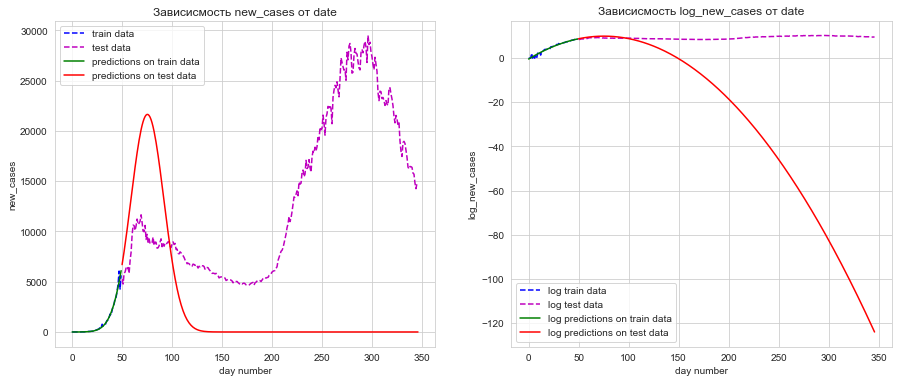

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
x_train = np.arange(0, train_size)
x_test = np.arange(train_size, len(df))

ax1.set_title("Зависисмость new_cases от date")
ax1.plot(x_train, df_train["new_cases"].values, "--b", label="train data")
ax1.plot(x_test, df_test["new_cases"].values, "--m", label="test data")
ax1.plot(x_train, preds_train_new_cases, "g", label="predictions on train data")
ax1.plot(x_test, preds_test_new_cases, "r", label="predictions on test data")
ax1.set(xlabel="day number", ylabel="new_cases")
ax1.legend()

ax2.set_title("Зависисмость log_new_cases от date")
ax2.plot(x_train, log_new_cases, "--b", label="log train data")
ax2.plot(x_test, np.log(df_test["new_cases"].values), "--m", label="log test data")
ax2.plot(x_train, preds_log_train_new_cases, "g", label="log predictions on train data")
ax2.plot(x_test, preds_log_test_new_cases, "r", label="log predictions on test data")
ax2.set(xlabel="day number", ylabel="log_new_cases")
ax2.legend()

plt.show()

In [34]:
preds_train_total_cases = np.cumsum(preds_train_new_cases)
preds_test_total_cases = np.cumsum(np.concatenate([preds_train_new_cases, preds_test_new_cases]))[train_size:]

preds_log_train_total_cases = np.log(preds_train_total_cases)
preds_log_test_total_cases = np.log(preds_test_total_cases)

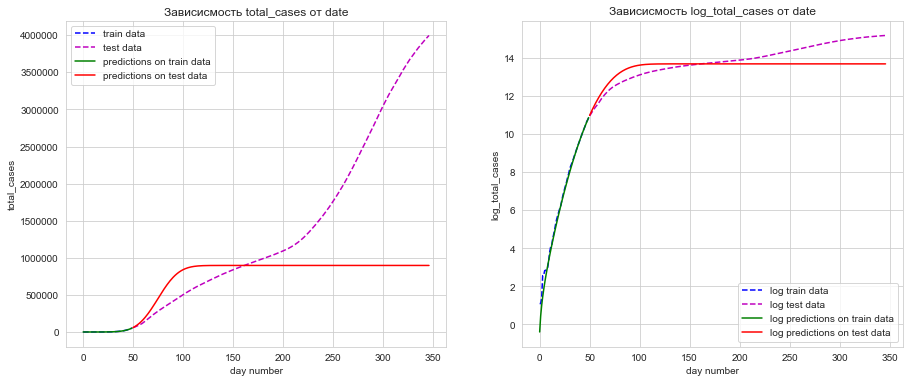

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.set_title("Зависисмость total_cases от date")
ax1.plot(x_train, df_train["total_cases"].values, "--b", label="train data")
ax1.plot(x_test, df_test["total_cases"].values, "--m", label="test data")
ax1.plot(x_train, preds_train_total_cases, "g", label="predictions on train data")
ax1.plot(x_test, preds_test_total_cases, "r", label="predictions on test data")
ax1.set(xlabel="day number", ylabel="total_cases")
ax1.legend()

ax2.set_title("Зависисмость log_total_cases от date")
ax2.plot(x_train, log_total_cases, "--b", label="log train data")
ax2.plot(x_test, np.log(df_test["total_cases"].values), "--m", label="log test data")
ax2.plot(x_train, preds_log_train_total_cases, "g", label="log predictions on train data")
ax2.plot(x_test, preds_log_test_total_cases, "r", label="log predictions on test data")
ax2.set(xlabel="day number", ylabel="log_total_cases")
ax2.legend()

plt.show()

In [36]:
a = lin_reg_for_new_cases.coef_[1]
b = lin_reg_for_new_cases.coef_[0]
c = lin_reg_for_new_cases.intercept_
true_mu = [c, b, a]
print(f"Свободный член: {true_mu[0]}, коэффициент при x: {true_mu[1]}, коэффициент при x^2: {true_mu[2]}")

Свободный член: -0.3965904028416256, коэффициент при x: 0.27562283190276415, коэффициент при x^2: -0.0018297906166869166


In [37]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 10 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

sigma_noise = get_sigma_noise(log_new_cases, preds_log_train_new_cases)

x_train = np.arange(0, train_size)
x_train = np.array(list(zip(x_train, x_train**2)))

for i in range(train_size):
    px, py = x_train[i], log_new_cases[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)

In [38]:
print(f"Апостериорное распределение параметров: cвободный член = {cur_mu[0]}, коэффициент при x = {cur_mu[1]}, коэффициент при x^2 = {cur_mu[2]}")

Апостериорное распределение параметров: cвободный член = -0.39574332233758014, коэффициент при x = 0.27555306297701065, коэффициент при x^2 = -0.0018286048586659553


### subtask c
        Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

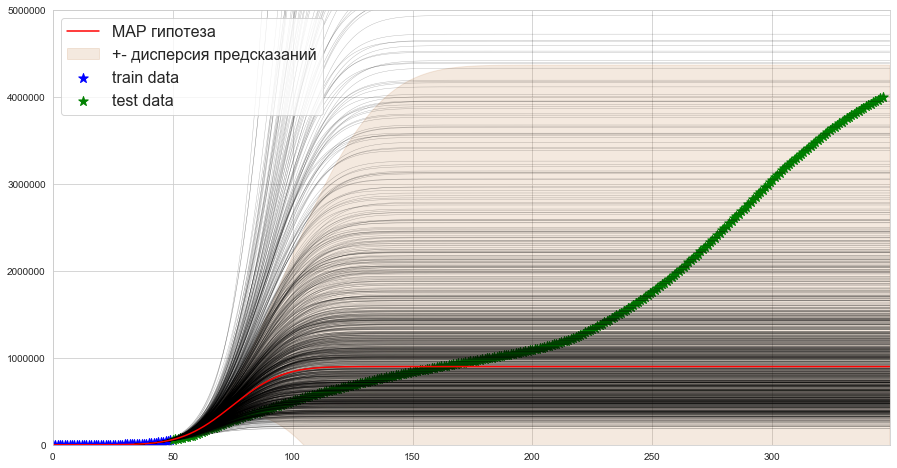

In [39]:
def plot_predictions(xs, mu, sigma, n, train_points, test_points):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.set_ylim((0, 5e6))
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        y = np.cumsum(np.exp(w[0] + w[1]*xs + w[2]*xs**2))
        ax.plot(xs, y, 'k-', lw=.4, alpha=0.3)
        res[i,:] = y
    ax.plot(xs, np.cumsum(np.exp(mu[2]*(xs**2) + mu[1]*xs + mu[0])), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.mean(res, axis=0) - np.std(res, axis=0), np.mean(res, axis=0) + np.std(res, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(train_points[0], train_points[1], marker='*', color="blue", s=100, label="train data")
    ax.scatter(test_points[0], test_points[1], marker='*', color="green", s=100, label="test data")
    ax.legend(fontsize=legend_fontsize)
    return res[:,-1]


num_days = 350
xs = np.arange(0, num_days)
x_train = np.arange(0, train_size)
dist = plot_predictions(xs, cur_mu, cur_sigma, n=1000, train_points=[x_train, df_train["total_cases"].values], test_points=[x_test[:num_days - 50], df_test["total_cases"].values[:num_days - 50]])

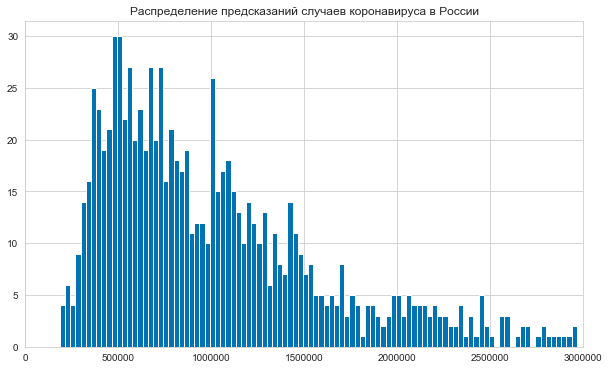

In [40]:
fig = plt.figure(figsize=(10,6))

plt.title("Распределение предсказаний случаев коронавируса в России")
plt.hist(dist[dist < 3e6], bins=100)
plt.xlim((0, 3e6))
plt.show()

In [42]:
print(f"Прогноз числа случаев коронавируса в пессимистичном сценарии: {np.percentile(dist, 90)}")
print(f"Прогноз числа случаев коронавируса в оптимистичном сценарии: {np.percentile(dist, 10)}")

Прогноз числа случаев коронавируса в пессимистичном сценарии: 2696786.0307346
Прогноз числа случаев коронавируса в оптимистичном сценарии: 406030.04503998446


## 4 task
        Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

In [43]:
df_all_countries = pd.read_csv("./owid-covid-data.csv")

In [44]:
coronavirus_begin = {
    "Germany": "2020-02-14",
    "Italy": "2020-02-06",
    "France": "2020-02-14",
    "United Kingdom": "2020-02-15",
    "Sweden": "2020-03-06",
    "Finland": "2020-03-03",
    "Norway": "2020-02-27",
    "Ukraine": "2020-03-04",
    "Brazil": "2020-03-15",
    "Argentina": "2020-03-14",
    "Peru": "2020-03-15",
    "Mexico": "2020-03-12",
    "United States": "2020-02-20",
    "Canada": "2020-02-23",
    "Japan": "2020-02-09",
    "India": "2020-02-28",
    "South Africa": "2020-03-10",
    "Egypt": "2020-03-06",
    "Australia": "2020-03-02",
}

In [45]:
TRAIN_SIZE = 50
all_parametres = []

def plot_country_predictions(country, xs, mu, sigma, n, train_points, test_points):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.set_ylim((0, test_points[1][-1]))
    ax.set_title(f"Зависисмость total_cases от date в {country}")
    ax.set(xlabel="day number", ylabel="total_cases")
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        y = np.cumsum(np.exp(w[0] + w[1]*xs + w[2]*xs**2))
        ax.plot(xs, y, 'k-', lw=.4, alpha=0.3)
        res[i,:] = y
    ax.plot(xs, np.cumsum(np.exp(mu[2]*(xs**2) + mu[1]*xs + mu[0])), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.mean(res, axis=0) - np.std(res, axis=0), np.mean(res, axis=0) + np.std(res, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(train_points[0], train_points[1], marker='*', color="blue", s=100, label="train data")
    ax.scatter(test_points[0], test_points[1], marker='*', color="green", s=100, label="test data")
    ax.legend(fontsize=legend_fontsize)
    return res[:,-1]


def plot_coronavirus_in_country(country, begin_date):
    df_country = df_all_countries[df_all_countries["location"] == country]
    df_country["date"] = pd.to_datetime(df_country["date"])
    df_country = df_country[df_country["date"] >= begin_date]
    df_country.loc[df_country["new_cases"] == 0, "new_cases"] = 1
    
    df_train = df_country.iloc[:TRAIN_SIZE]
    df_test = df_country.iloc[TRAIN_SIZE:]
    
    log_new_cases = np.log(df_train["new_cases"].values)
    lin_reg_for_new_cases = LinearRegression()
    
    x_train = np.arange(0, TRAIN_SIZE)
    x_train = np.array(list(zip(x_train, x_train**2)))
    lin_reg_for_new_cases.fit(x_train, log_new_cases)
    
    x_test = np.arange(TRAIN_SIZE, len(df_country))
    x_test = np.array(list(zip(x_test, x_test**2)))
    
    preds_log_test_new_cases = lin_reg_for_new_cases.predict(x_test)
    preds_test_new_cases = np.exp(preds_log_test_new_cases)
    preds_log_train_new_cases = lin_reg_for_new_cases.predict(x_train)
    preds_train_new_cases = np.exp(preds_log_train_new_cases)
    
    preds_train_total_cases = np.cumsum(preds_train_new_cases)
    preds_test_total_cases = np.cumsum(np.concatenate([preds_train_new_cases, preds_test_new_cases]))[TRAIN_SIZE:]
    preds_log_train_total_cases = np.log(preds_train_total_cases)
    preds_log_test_total_cases = np.log(preds_test_total_cases)
    
    cur_mu, cur_sigma = np.array([0, 0, 0]), 10 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    sigma_noise = get_sigma_noise(log_new_cases, preds_log_train_new_cases)

    for i in range(TRAIN_SIZE):
        px, py = x_train[i], log_new_cases[i]
        cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
    
    all_parametres.append([country, cur_mu])
    
    num_days = 350
    xs = np.arange(0, num_days)
    x_test = np.arange(TRAIN_SIZE, len(df_country))
    x_train = np.arange(0, TRAIN_SIZE)
    dist = plot_country_predictions(country, xs, cur_mu, cur_sigma, n=1000, train_points=[x_train, df_train["total_cases"].values], test_points=[x_test[:num_days - TRAIN_SIZE], df_test["total_cases"].values[:num_days - TRAIN_SIZE]])

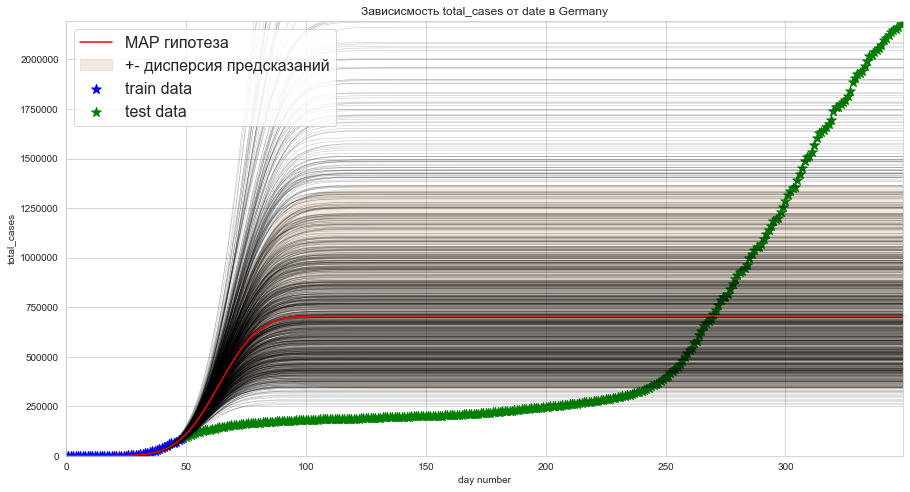

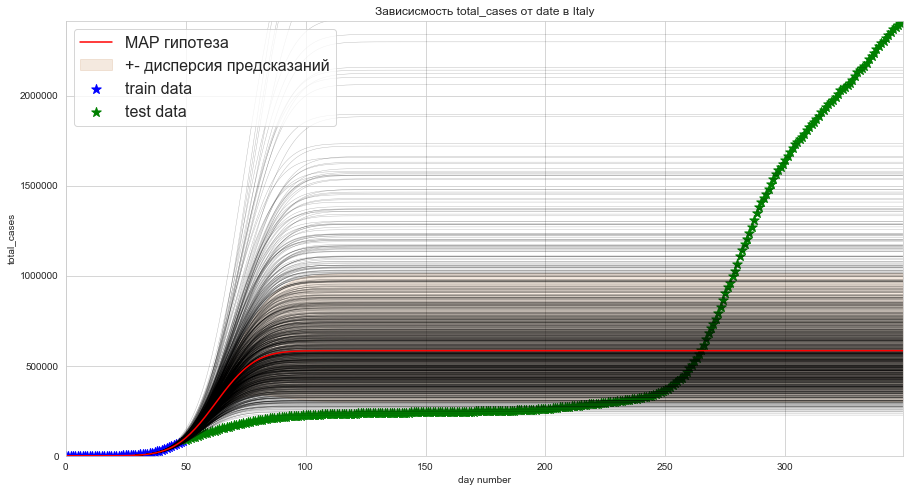

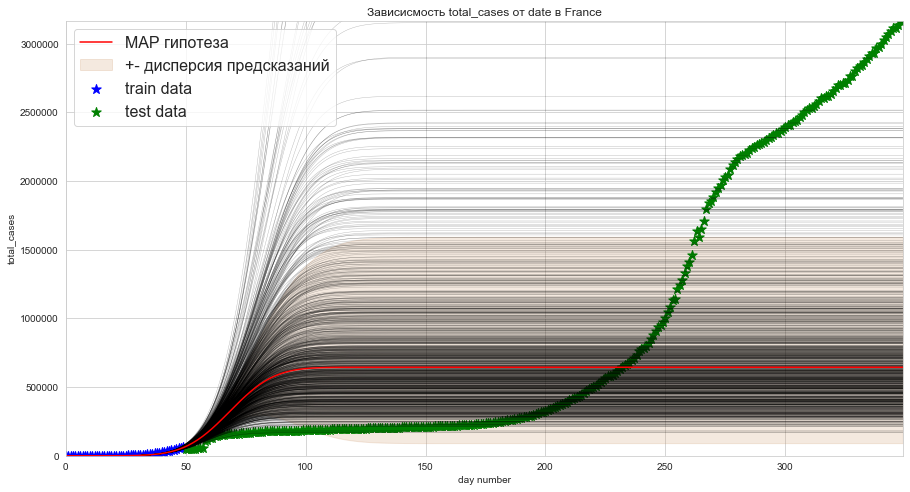

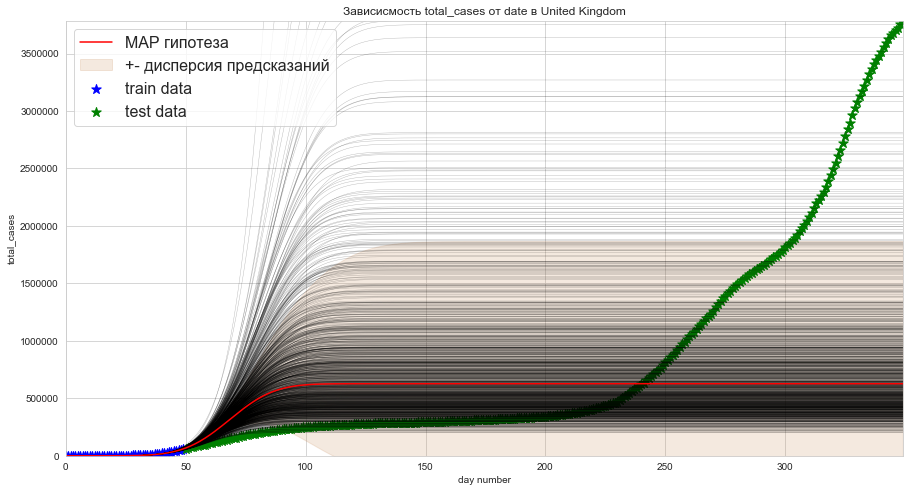

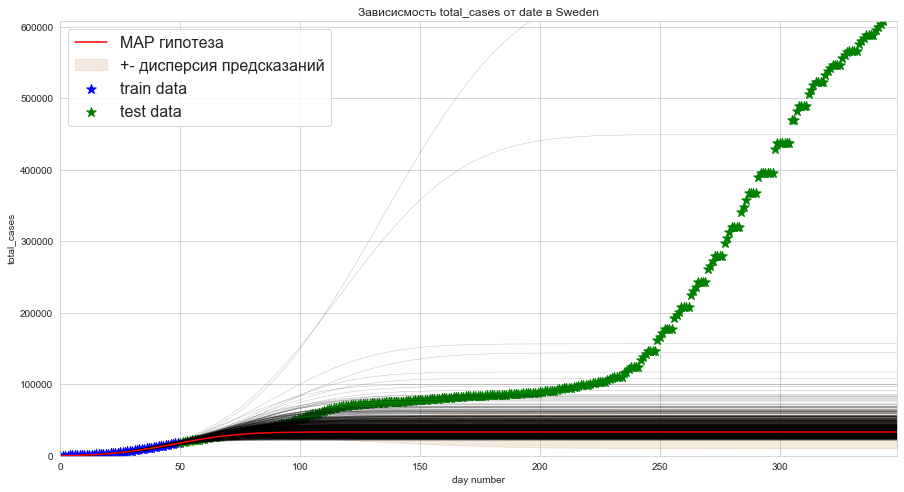

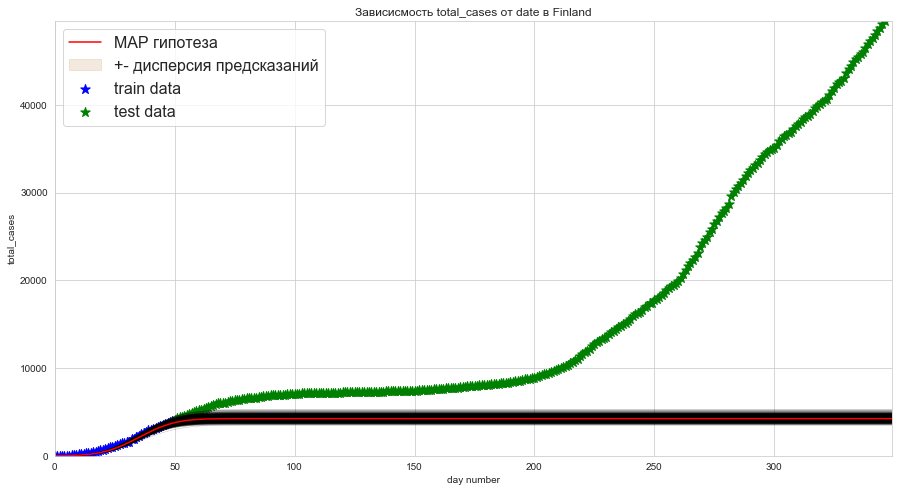

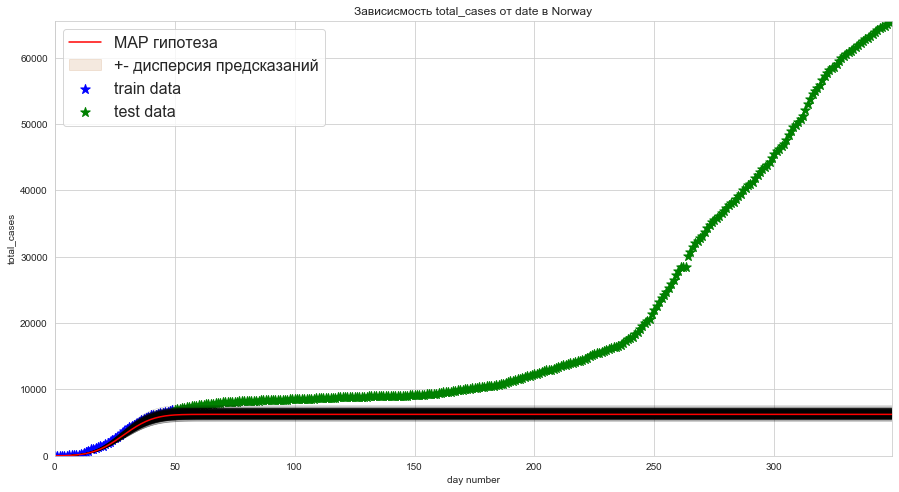

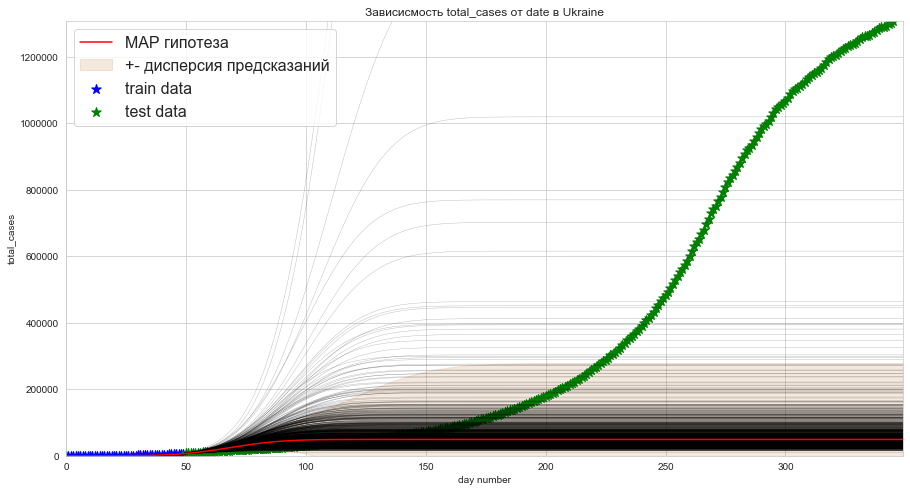

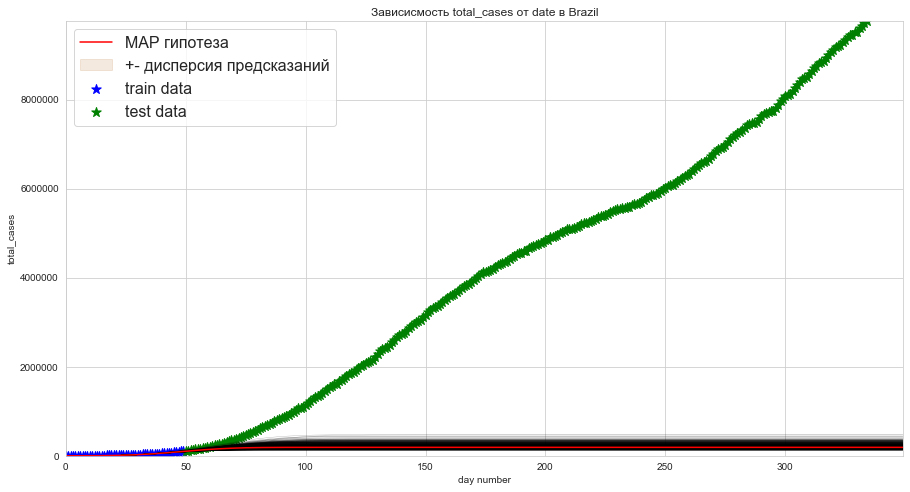

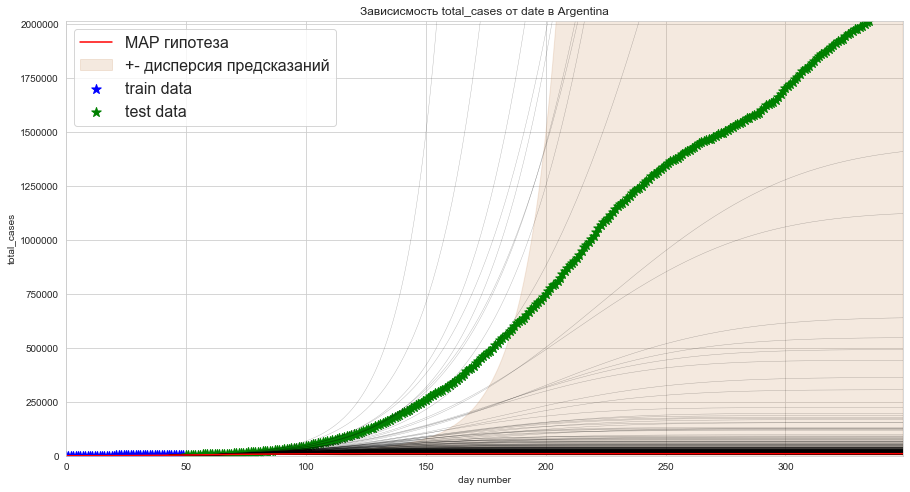

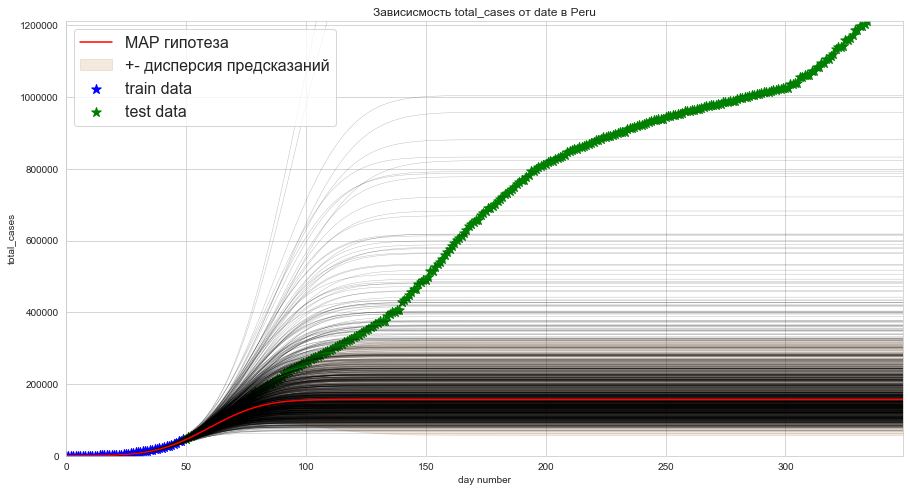

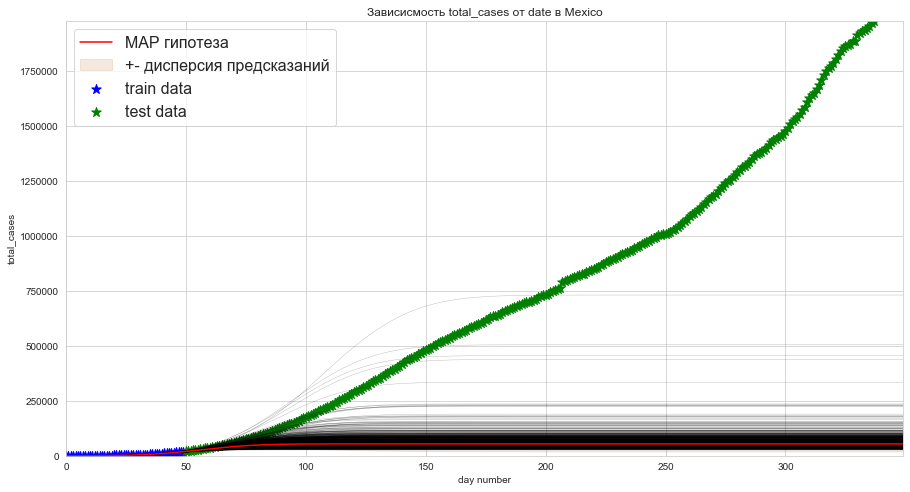

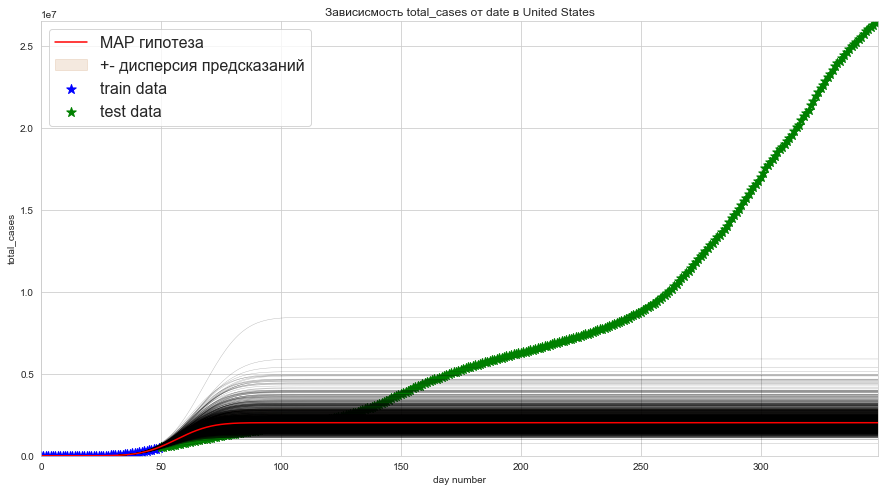

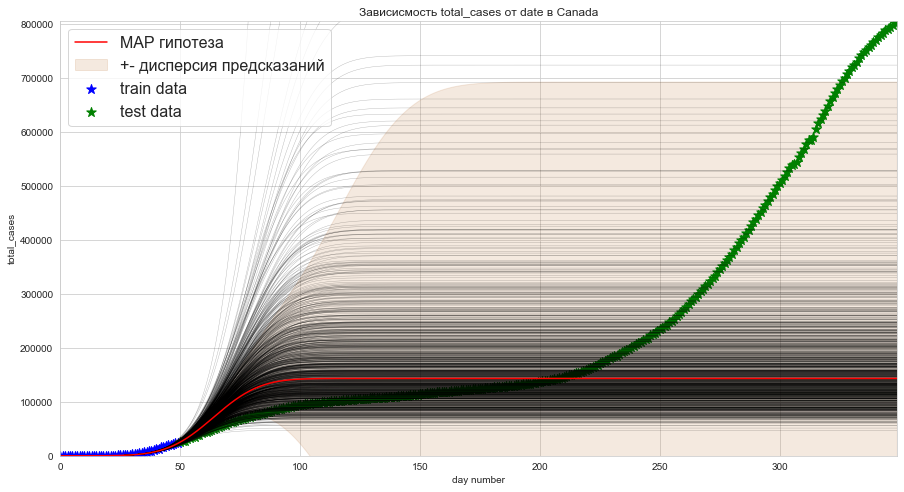

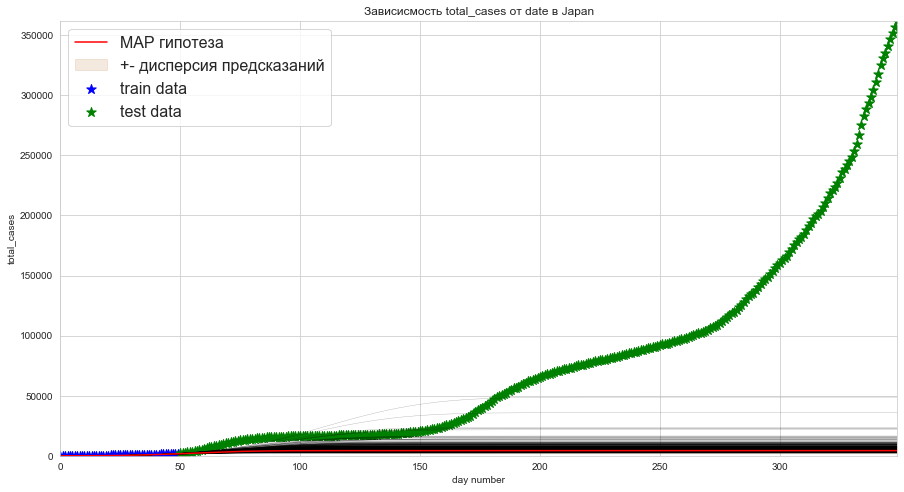

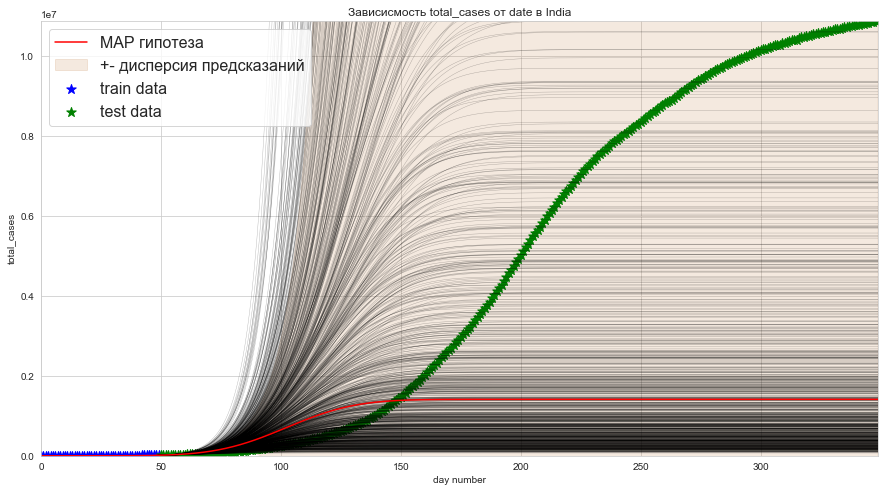

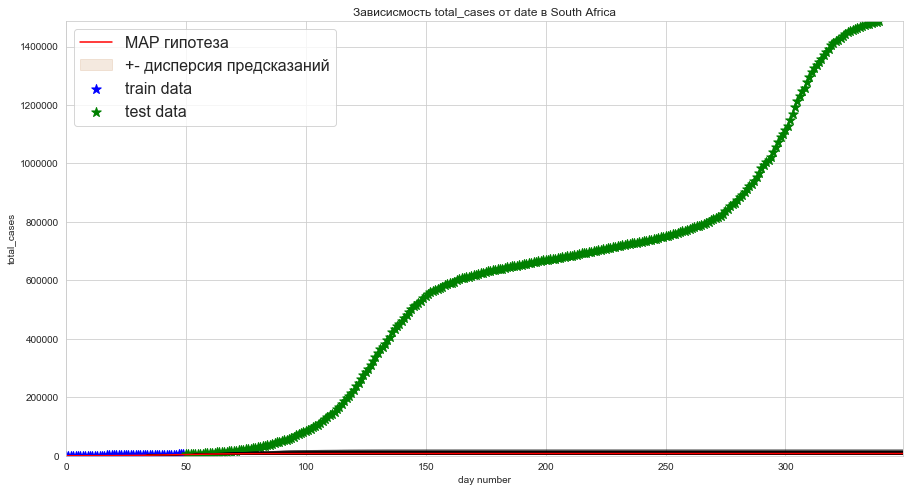

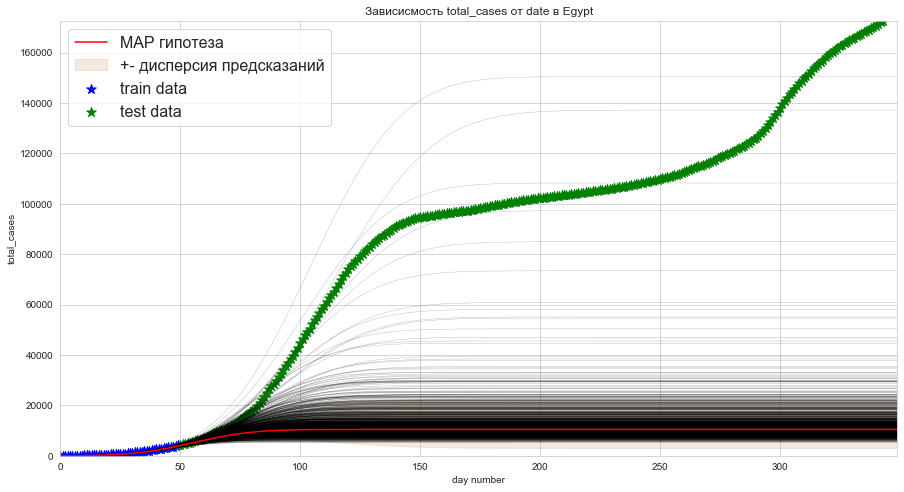

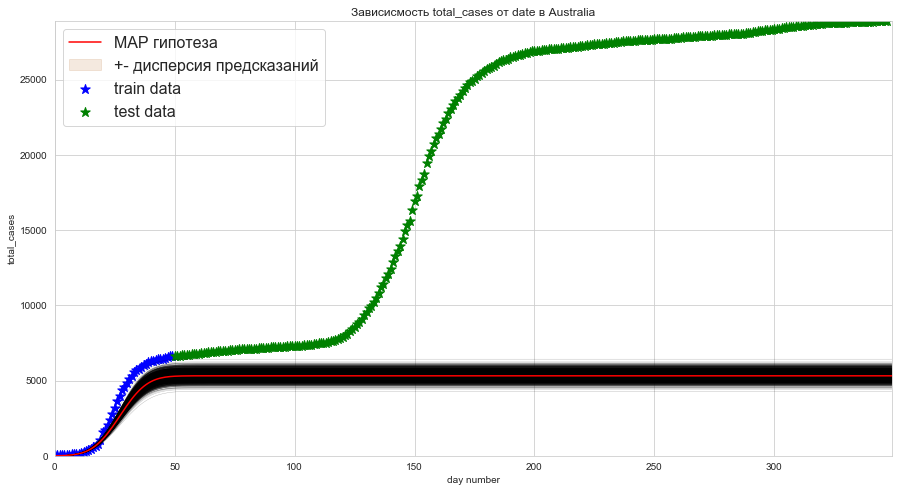

In [46]:
for counry, begin_date in coronavirus_begin.items():
    plot_coronavirus_in_country(counry, begin_date)

Для визуальной кластеризации параметров разделим число new_cases на население (population) соответствующей страны. Таким образом, кластеры выйдут более осмысленными, так как в качестве целевой переменной будет выступать доля заболевших от населения всей страны.

In [47]:
normalized_all_parametres = []

def train_normalized_new_coronavirus_cases_in_country(country, begin_date):
    df_country = df_all_countries[df_all_countries["location"] == country]
    df_country["date"] = pd.to_datetime(df_country["date"])
    df_country = df_country[df_country["date"] >= begin_date]
    df_country.loc[df_country["new_cases"] == 0, "new_cases"] = 1
    
    population = df_country.population.iloc[0]

    df_train = df_country.iloc[:TRAIN_SIZE]
    log_new_cases = np.log(df_train["new_cases"].values / population)
    lin_reg_for_new_cases = LinearRegression()
    
    x_train = np.arange(0, TRAIN_SIZE)
    x_train = np.array(list(zip(x_train, x_train**2)))
    lin_reg_for_new_cases.fit(x_train, log_new_cases)
    
    preds_log_train_new_cases = lin_reg_for_new_cases.predict(x_train)
    
    cur_mu, cur_sigma = np.array([0, 0, 0]), 10 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    sigma_noise = get_sigma_noise(log_new_cases, preds_log_train_new_cases)

    for i in range(TRAIN_SIZE):
        px, py = x_train[i], log_new_cases[i]
        cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
    
    return cur_mu

for country, begin_date in coronavirus_begin.items():
    cur_mu = train_normalized_new_coronavirus_cases_in_country(country, begin_date)
    normalized_all_parametres.append([country, cur_mu])

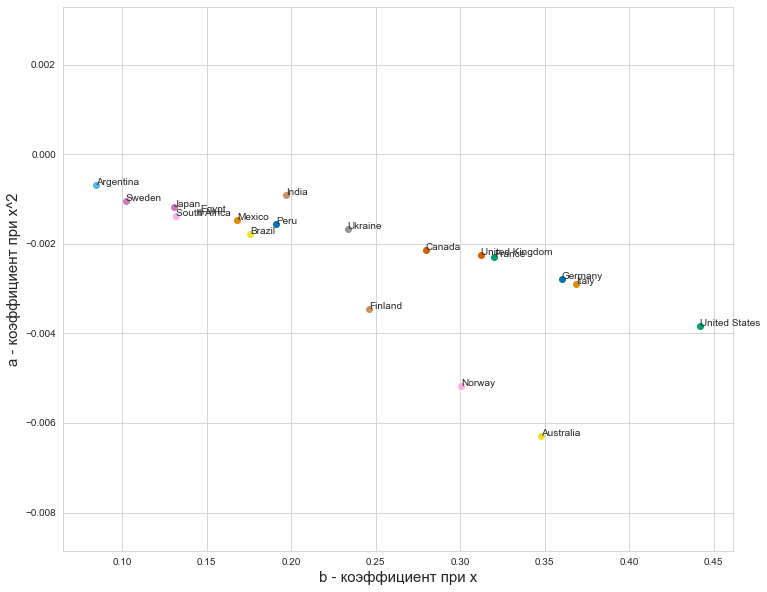

In [48]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("b - коэффициент при x", fontsize = 15)
ax.set_ylabel("a - коэффициент при x^2", fontsize = 15)

for i, j in normalized_all_parametres:
    plt.scatter(j[1], j[2])
    plt.annotate(i, (j[1], j[2]))

В данном случае можно выделить несколько кластеров:

1) страны западной Европы (Великобритания, Германия, Италия, Франция);

2) страны Южной Америки и Африки(Бразилия, Перу, Аргентина, Мексика(хоть это не Южная Америка, но все равно рядом), Египет, ЮАР). В этом числе затесалась Швеция, но как мы знаем в Швеции не вводили жесткие карантинные меры (возможно именно поэтому она находится среди этих стран).

3) Особняком стоят такие страны как Австралия, Норвегия, Финляндия и США. Наверное, можно считать, что эти страны - outliers. Что ж, Австралию и в географическом плане (с точки зрения расположения на карте) можно считать как outlier)))

## 5 task
        Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение,       например, о том, нужно ли вводить карантин?

Моделировать коронавирус экспонентой точно нельзя))). Моделировать сигмоидой получается безусловно лучше, но все же далеко не идеально.  Все-таки в ретроспективе мы знаем, что во многих странах было 2 волны коронавируса (весной и осенью). Соответственно, сигмоидальная функция не будет ложиться идеально на большинство стран мира.  

Если смотреть на общее число заболевших в одной стране через год после начала пандемии, то результаты, полученные из семплирования, различаются довольно-таки сильно. Из этих данных тоже довольно сложно принять какое-либо решение о введении карантина.